In [29]:
import numpy as np
import math
import csv
import pandas as pd
import matplotlib.pyplot

import plotfunctions
%run plotfunctions.py
import experiments
%run experiments.py
import simulations
%run simulations.py
import problem_description
%run problem_description.py

# Computational Model 
This analysis was performed on the Electronic Drug Delivery System (EDDS) with the following geometry, boundary conditions, and solver specifications. 

#### Operating Conditions
Boundary Conditions
- Inlet velocity: 0.5 [L/min]
- Outlet Pressure: 101.33 [kPa]
- Nonslip Walls
- Applied Power Profile: Max of 1 Watt applied over 10 seconds 

Solver Tolerance
- Residual Target: 1e-05 

System State
- Transient State
- Duration: 14 [sec]
- timestep: adaptive ranging from 0.0001[sec] to 0.01[sec]

Fluid Type
- Air at room temperature (incompressible fluid) 

In [11]:
print('GEOMETRY SPECIFICATIONS: \n',geom_db,'\n',coil10)

GEOMETRY SPECIFICATIONS: 
         label  Diameter[mm]  Length[mm]  Thickness[mm]
0  Mouthpiece          8.02      13.960           0.13
1        Pipe          4.54      27.955           0.15
2    Atomizer          4.54       7.500           0.15
3  Inlet Pipe          4.54       2.170           0.15 
 {'Coil_qty': 12, 'Coil_Diameter': 0.3, 'Coil_Spacing': 0.5}


![fullgeometry_schematic](images/geometry/schematic.jpg)

#### System Response Quanty (SRQ)
The SRQ's are the temperature measurements (temperature rise) at 4 radial positions located 1mm above the mouthpiece. See the following figure:   
![srq.jpg](images/srq/srq.jpg)![srq_fullgeo.jpg](images/srq/srq_fullgeo.jpg)
![srq_schematic.jpg](images/srq/srq_schematic.jpg)

### Simulaton Samples Generation
In order to generate simulation samples, the following steps were taken:

1. Identify key parameters (using local sensitivity analysis):
   - Inlet Airflow
   - Applied Power (Two Factors)

2. Identify the measurement accuracy tolerance to establish the uncertainties with each quantity and use a uniform distribution given these uncertainty bounds as the range:
   - Input Velocity [0.49-0.51]
   - Applied Power [0.9995,1.0005]
   - Time to Max Power [1,3]

3. Apply Latin Hypercube Sampling (LHS) with the uniform distributions and generate 10 random samples for the input paramaters.

4. Propagate these 10 input random sample conditions through the model and generate 10 simulation sample predictions.

In [12]:
print('The following are the Input Parameter Samples')
inputsamples 

The following are the Input Parameter Samples


,0,1,2,3
0,,VFR [L/min],Power[W],Time to Max Power[s]
1,Sample1,0.49444,0.999854,1.708276
2,Sample2,0.497275,1.000266,2.531816
3,Sample3,0.506627,0.999797,1.593601
4,Sample4,0.509589,1.000491,2.981642
5,Sample5,0.491796,1.000308,2.616563
6,Sample6,0.494134,0.999897,1.793473
7,Sample7,0.507415,1.000018,2.036836
8,Sample8,0.508372,0.999688,1.375442
9,Sample9,0.499768,1.000112,2.223488


#### Applied Power Profiles (in more detail)
The applied power is characterized by two key parameters: maximum power and time to reach maximum power. Each parameter is associated with its own uncertainty. To capture this uncertainty, the Applied Power Profiles were generated using a linear relationship from 0 to the LHS generated quantity. This profile is used in the model and is applied to the entirety of the 12 coil volume. 
<!-- ![12coils1](12coils1.jpg) -->
![12coils2](images/coils/12coils2.jpg) 
The following plot shows the sample specific parameters for both the applied power and time to max power.  

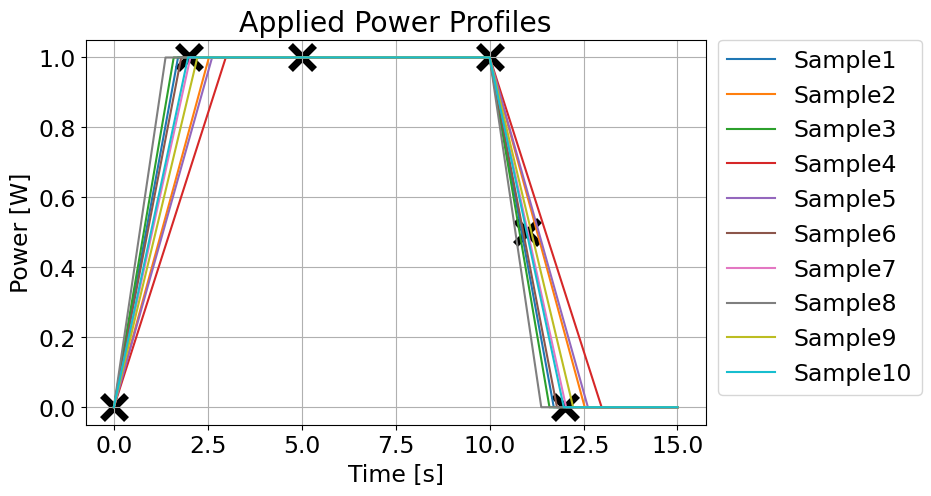

In [30]:
dataPowerS1 = pd.read_csv("data/data_power/sample1.csv")
dataPowerS2 = pd.read_csv('data/data_power/sample2.csv')
dataPowerS3 = pd.read_csv('data/data_power/sample3.csv')
dataPowerS4 = pd.read_csv('data/data_power/sample4.csv')
dataPowerS5 = pd.read_csv('data/data_power/sample5.csv')
dataPowerS6 = pd.read_csv('data/data_power/sample6.csv')
dataPowerS7 = pd.read_csv('data/data_power/sample7.csv')
dataPowerS8 = pd.read_csv('data/data_power/sample8.csv')
dataPowerS9 = pd.read_csv('data/data_power/sample9.csv')
dataPowerS10 = pd.read_csv('data/data_power/sample10.csv')
save = 'YES' #'YES'
powerprof(dataPowerS1,dataPowerS2,dataPowerS3,dataPowerS4,dataPowerS5,
          dataPowerS6,dataPowerS7,dataPowerS8,dataPowerS9,dataPowerS10, save)

### Results - Samples

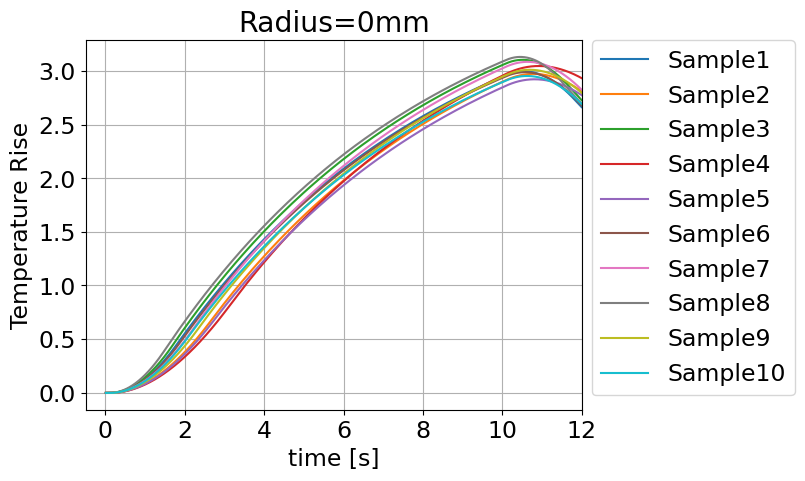

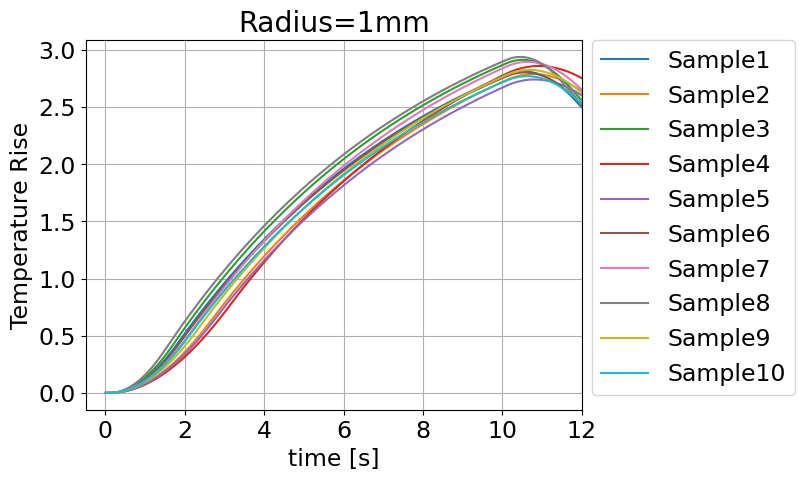

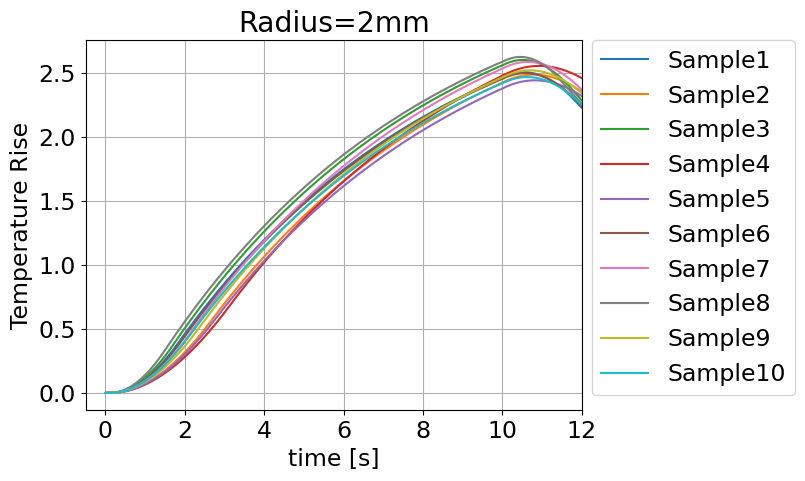

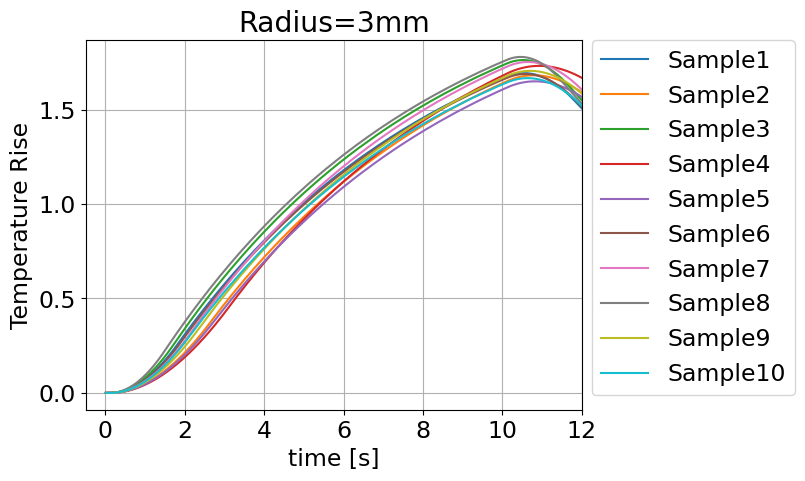

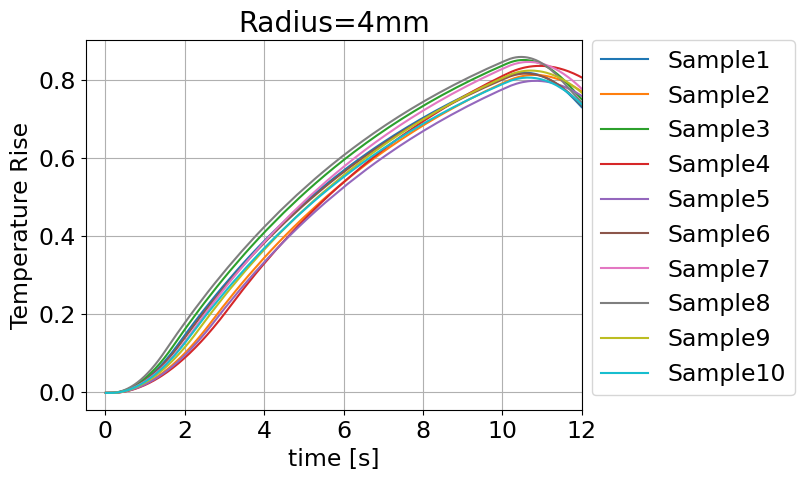

In [23]:
# Point 0
r, point0 = 0, 'Monitor Point: Mouthpiece1mm0mmTempX0YZ (Temperature) [K]' # radius for label, dataframe center labelsave = 'No' # 'YES'
save = 'YES' # 'YES'
plotexp = 'No'
sim_exp_pointlabels(timeE,avg0,u0,l0,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,
              tempS7,tempS8,tempS9,tempS10,tempSLab,r,point0,save,plotexp)

# Point 1
r, point1 = 1, 'Monitor Point: Mouthpiece1mm1mmTempX0YZ (Temperature) [K]' # radius for label, dataframe center labelsave = 'No' # 'YES'
save = 'YES' # 'YES'
plotexp = 'No'
sim_exp_pointlabels(timeE,avg1,u1,l1,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,
              tempS7,tempS8,tempS9,tempS10,tempSLab,r,point1,save,plotexp)

# Point 2
r, point2 = 2, 'Monitor Point: Mouthpiece1mm2mmTempX0YZ (Temperature) [K]' # radius for label, dataframe center labelsave = 'No' # 'YES'
save = 'YES' # 'YES'
plotexp = 'No'
sim_exp_pointlabels(timeE,avg2,u2,l2,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,
              tempS7,tempS8,tempS9,tempS10,tempSLab,r,point2,save,plotexp)

# Point 3
r, point3 = 3, 'Monitor Point: Mouthpiece1mm3mmTempX0YZ (Temperature) [K]' # radius for label, dataframe center labelsave = 'No' # 'YES'
save = 'YES' # 'YES'
plotexp = 'NO' # This data doesn't exist
sim_exp_pointlabels(timeE,avg1,u1,l1,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,
              tempS7,tempS8,tempS9,tempS10,tempSLab,r,point3,save,plotexp)

# Point 4
r, point4 = 4, 'Monitor Point: Mouthpiece1mm4mmTempX0YZ (Temperature) [K]' # radius for label, dataframe center labelsave = 'No' # 'YES'
save = 'YES' # 'YES'
plotexp = 'No'
sim_exp_pointlabels(timeE,avg4,u4,l4,tempS1,tempS2,tempS3,tempS4,tempS5,tempS6,
              tempS7,tempS8,tempS9,tempS10,tempSLab,r,point4,save,plotexp)

In [15]:
# plots_simMeans()

The following are Max Temperatures ($^\circ K$) over all timesteps with uncertainties for 10 sample simulation radial predictions 1mm above the mouthpiece.

In [16]:
np.transpose(maxUQ_radial)

,r=0mm,r=1mm,r=2mm,r=3mm,r=4mm
0,301.17+/- 0.065,300.99+/- 0.0617,300.68+/- 0.0575,299.87+/- 0.0411,298.98+/- 0.0194


# Experiments
All experiments were replicated three times to create a 3 sample experiment. 

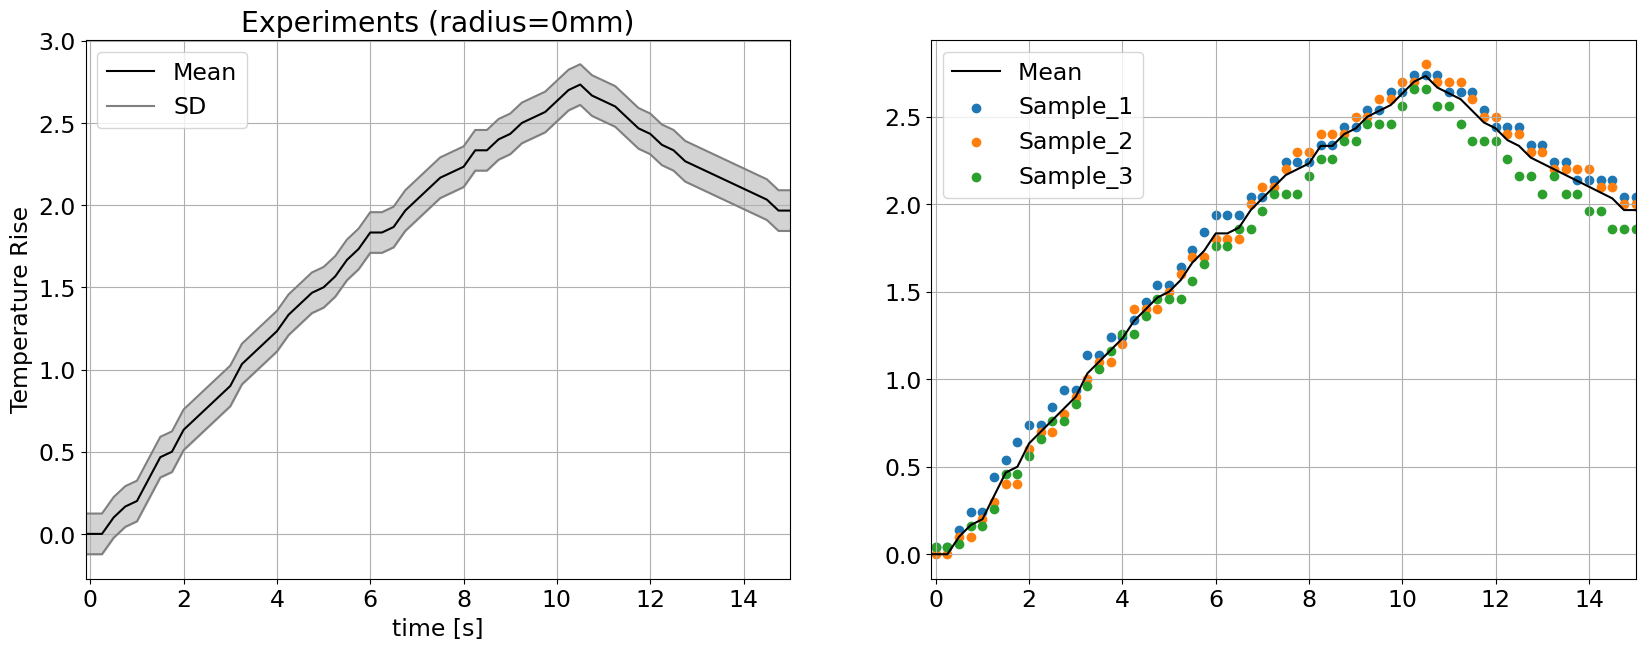

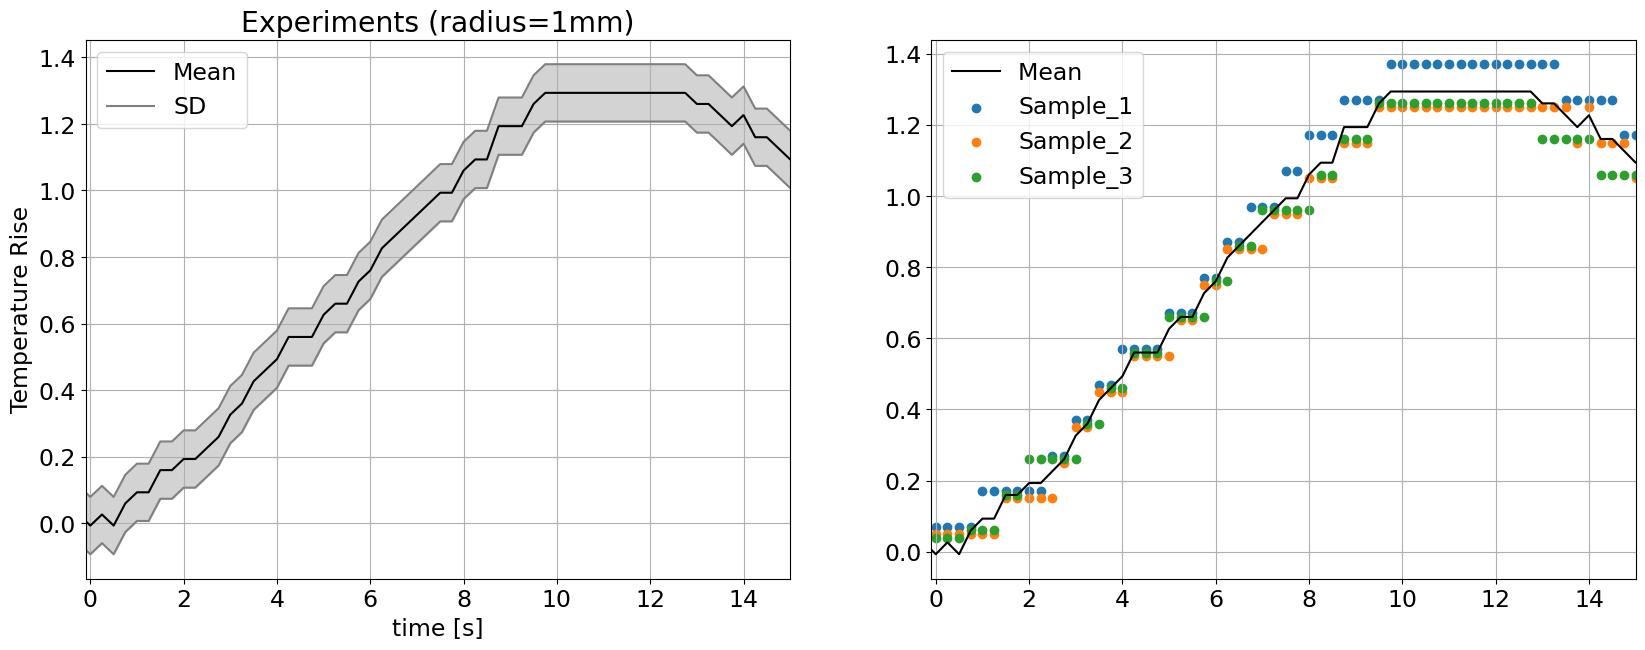

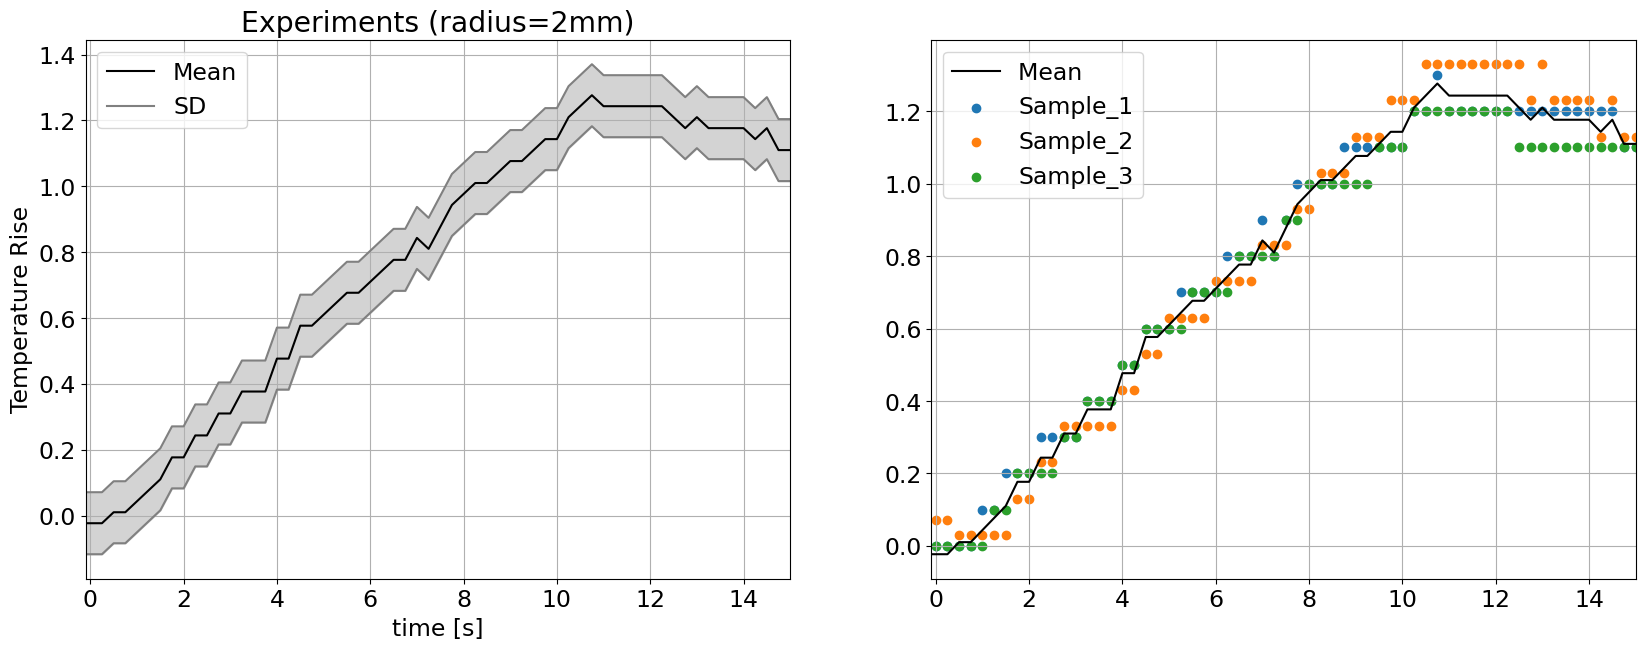

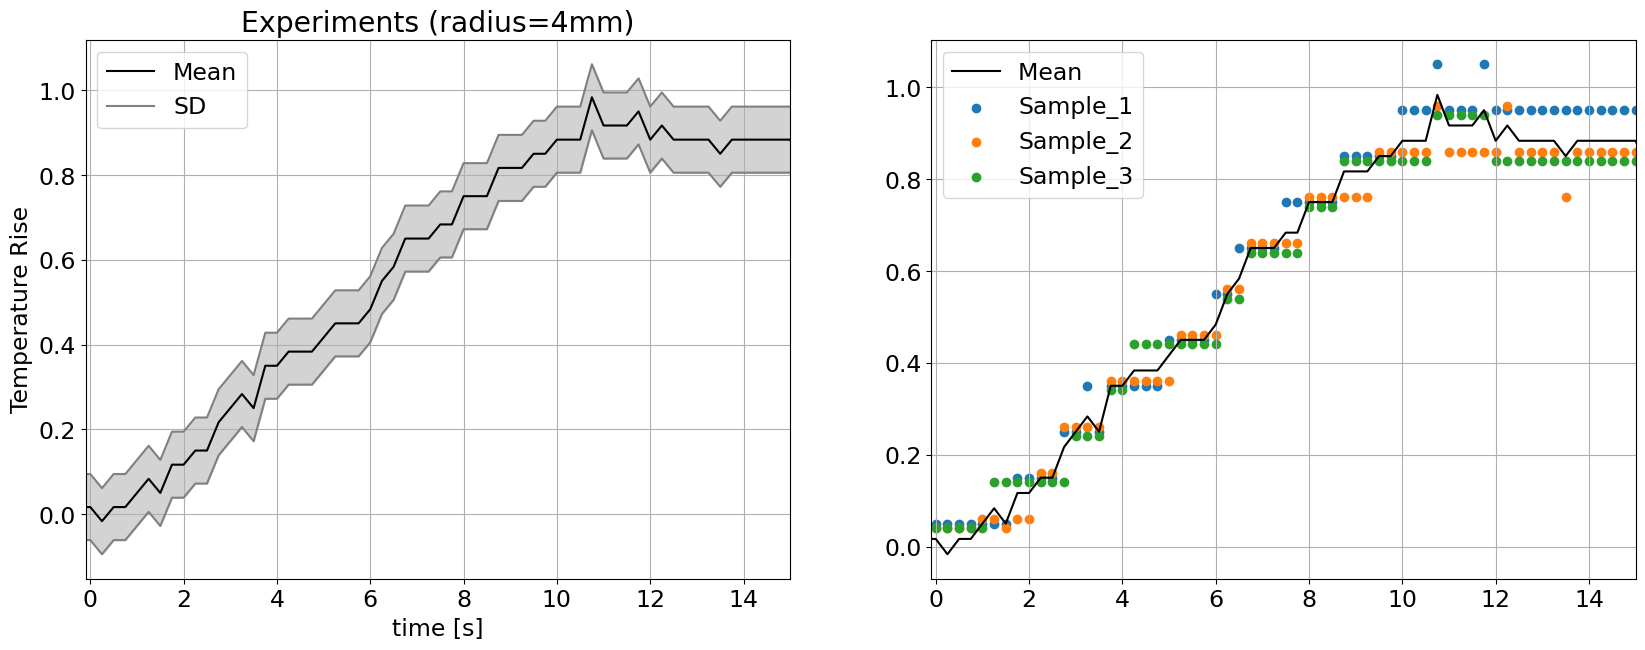

In [17]:
save = 'YES' #'YES'
exp_statsvsraw_2plots(0,timeE,avg0,u0,l0,tempET2diff,save)
exp_statsvsraw_2plots(1,timeE,avg1,u1,l1,tempET3diff,save)    
exp_statsvsraw_2plots(2,timeE,avg2,u2,l2,tempET1diff,save)    
exp_statsvsraw_2plots(4,timeE,avg4,u4,l4,tempET4diff,save)

### Experiments - Summary Plots

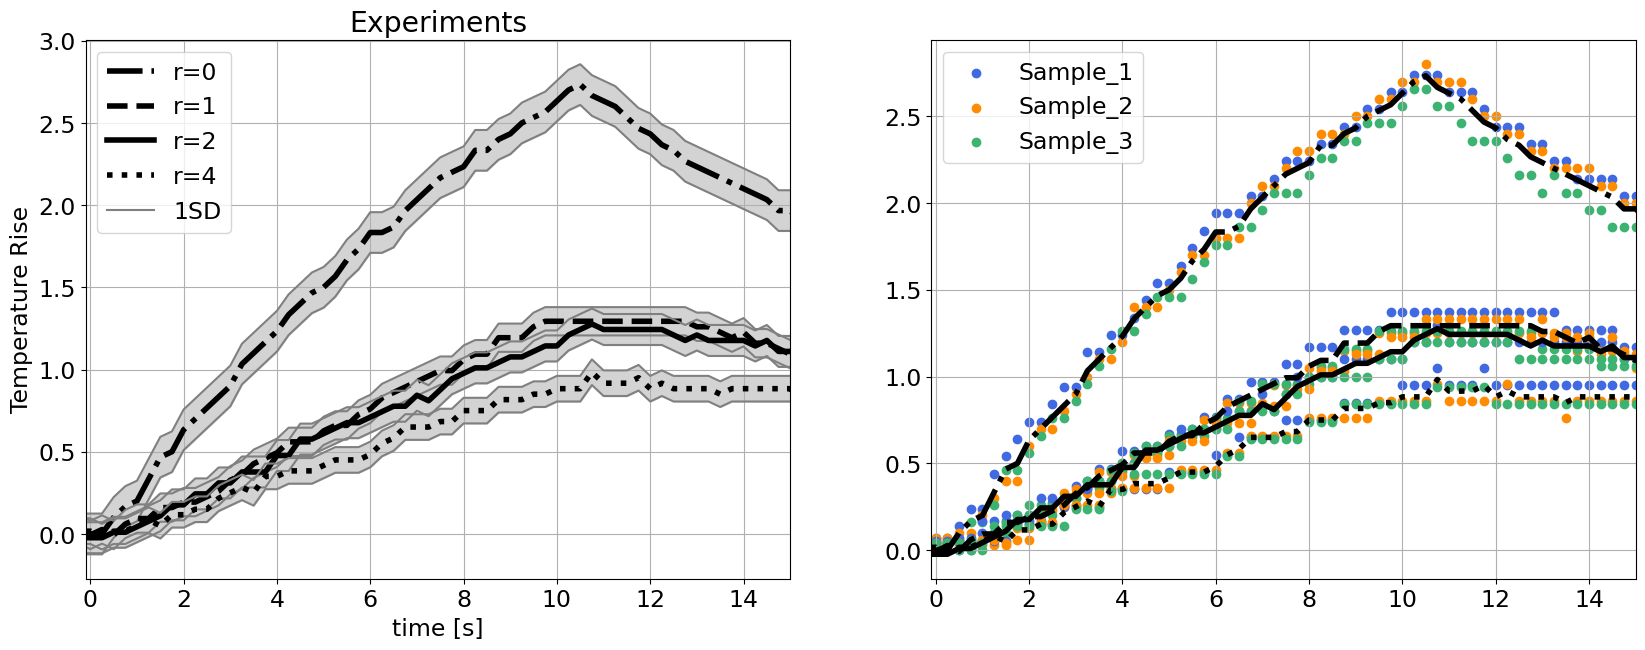

In [18]:
save = 'YES' #'NO'
exp_ALL_2plots(timeE,avg0,avg1,avg2,avg4,u0,u1,u2,u4,l0,l1,l2,l4,tempET1diff,tempET2diff,tempET3diff,tempET4diff,save)

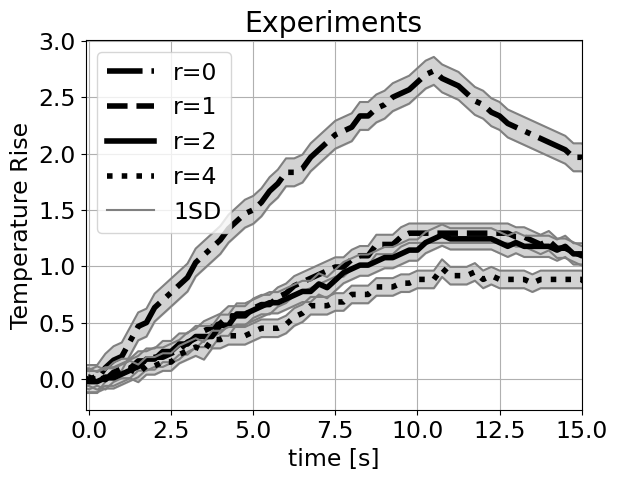

In [19]:
exp_ALL_1plot(timeE,avg0,avg1,avg2,avg4,u0,u1,u2,u4,l0,l1,l2,l4,tempET1diff,tempET2diff,tempET3diff,tempET4diff,save)